In [1]:
# Libraries
library(Seurat)
library(SeuratHelper)
library(dplyr)
library(stringr)
library(tidyr)
library(ggplot2)
library(readxl)
library(cowplot)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
devtools::load_all("~/projects/SeuratHelper")

ℹ Loading SeuratHelper


In [3]:
# Adjust PATH
wd <- getwd()
subdir <- "/bin"
if (endsWith(wd, subdir)) {
    wd <- str_remove(wd, subdir)
    setwd(wd)
}
getwd()

[1] "/vol/projects/odietric/covid19-bal-atlas-integration"

In [4]:
# Variables
in_file <- "data/BCB/seurat.Rds"
url_markers <- "https://syncandshare.desy.de/index.php/s/B4PDcHA8Jg8zZBm"
url_markers <- paste0(url_markers, "/download")
in_markers <- "docs/celltype/markers.xlsx"
plot_dir <- "analysis/BCB/malainou/"
dir.create(plot_dir)

In [5]:
# Download data
download.file(url_markers, in_markers)

In [7]:
# Read data
sheets <- excel_sheets(in_markers)
markers <- list()
for (i in sheets) {
    markers[[i]] <- read_excel(in_markers, i)
}
ds <- readRDS(in_file)

New names:
• `` -> `...3`
• `` -> `...4`
New names:
• `` -> `...3`
New names:
• `` -> `...4`
• `` -> `...5`


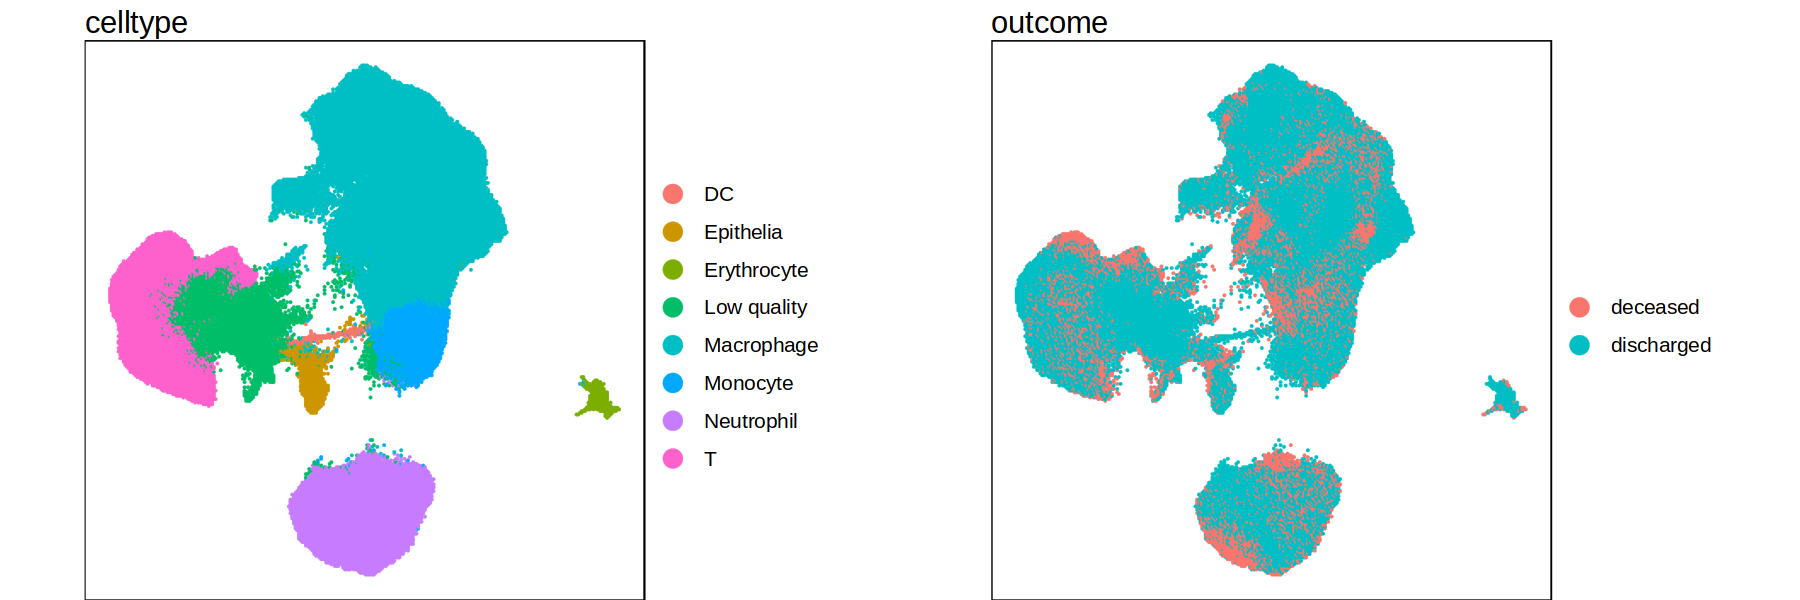

In [11]:
# Plot
options(repr.plot.width=15, repr.plot.height=5)
emb <- "mnn_30_umap"
cowplot::plot_grid(
    plot_embedding(ds, "celltype", legend.cols = 1, embedding=emb),
    plot_embedding(ds, "outcome", legend.cols = 1, embedding=emb)
    )

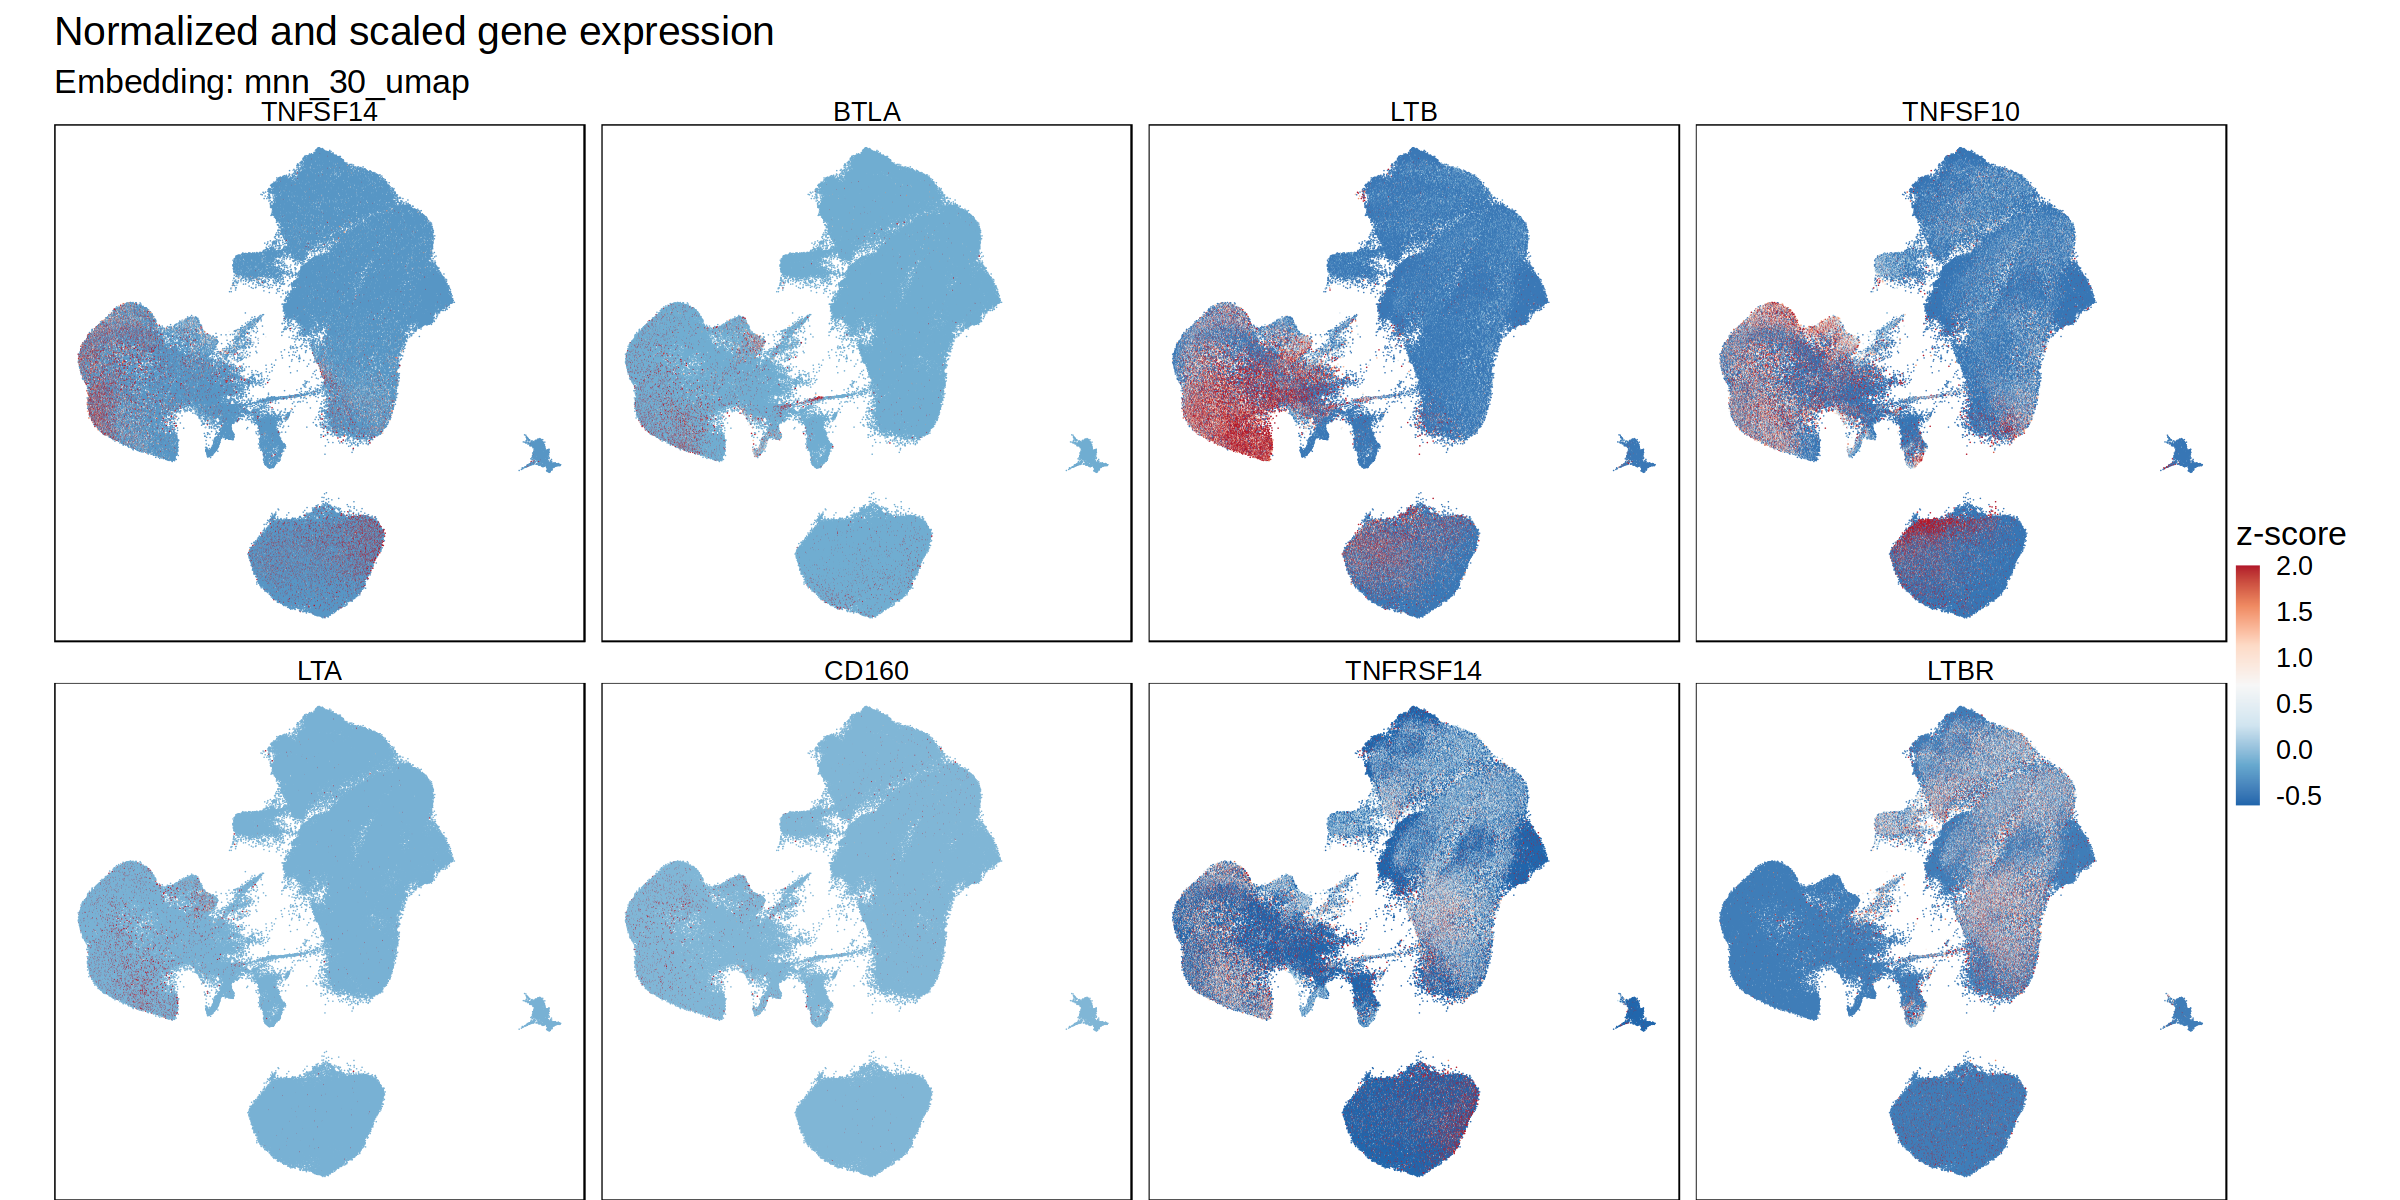

In [12]:
# Malainou - acute phase
options(repr.plot.width=20, repr.plot.height=10)
genes <- markers$malainou$gene
plot_markers_embedding(ds, markers = genes, nrow = 2, pt.stroke = .1, pt.size = .1, embedding=emb)
fn <- paste0(plot_dir, emb, "_", "malainou-markers", ".", "png")
ggsave(fn, width = 12, height = 6, bg="white", limitsize = FALSE)